In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.autograd import Variable


In [6]:
data= pd.read_csv('MLP_regresion.csv')
data.keys()

Index(['X', 'Y'], dtype='object')

In [7]:
x=data['X'].to_numpy()
y=data['Y'].to_numpy()
np.shape(x), np.shape(y)

((1000,), (1000,))

In [8]:
#Convertir los np. a tensores

X= Variable(torch.from_numpy(x)).float()
X= torch.unsqueeze(X,dim=1)

Y= Variable(torch.from_numpy(y)).float()
Y= torch.unsqueeze(Y,dim=1)

# Primer Modelo

In [23]:
input_dim=1
model= torch.nn.Sequential(
    #Primera capa
    torch.nn.Linear(input_dim,20),
    torch.nn.ReLU(),
    #Segunda capa
    torch.nn.Linear(20,40),
    torch.nn.ReLU(),
    #Tercera capa
    torch.nn.Linear(40,70),
    torch.nn.ReLU(),
    #Cuarta capa
    torch.nn.Linear(70,110),
    torch.nn.ReLU(),
    #Quinta capa
    torch.nn.Linear(110,50),
    torch.nn.ReLU(),
    #Sexta capa
    torch.nn.Linear(50,20),
    torch.nn.ReLU(),
    #Septima capa
    torch.nn.Linear(20,input_dim)
            #%No ponemos función aqui por que queremos que nos de los varoles de la curva no uno entre 0 y 1
)
model

Sequential(
  (0): Linear(in_features=1, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=40, bias=True)
  (3): ReLU()
  (4): Linear(in_features=40, out_features=70, bias=True)
  (5): ReLU()
  (6): Linear(in_features=70, out_features=110, bias=True)
  (7): ReLU()
  (8): Linear(in_features=110, out_features=50, bias=True)
  (9): ReLU()
  (10): Linear(in_features=50, out_features=20, bias=True)
  (11): ReLU()
  (12): Linear(in_features=20, out_features=1, bias=True)
)

In [24]:
optimizer= torch.optim.SGD(model.parameters(), lr=0.1)
criterion= torch.nn.MSELoss()

Epoch[0/3600], loss:0.7374489307403564


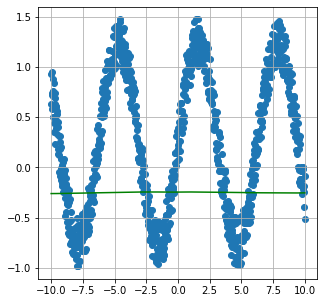

Epoch[200/3600], loss:0.43760809302330017


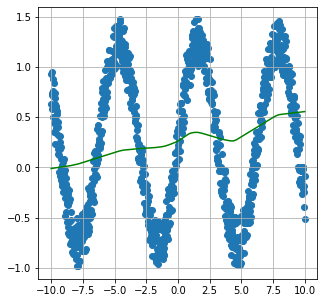

Epoch[400/3600], loss:0.2703474164009094


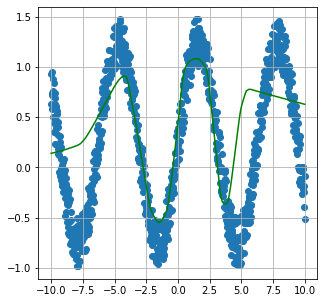

Epoch[600/3600], loss:0.11521391570568085


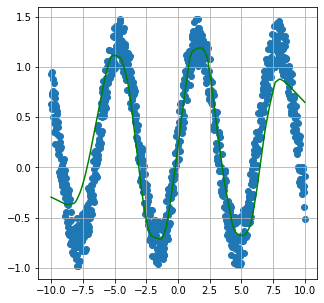

Epoch[800/3600], loss:0.09866630285978317


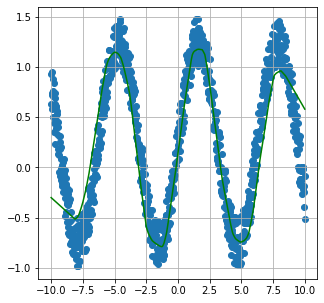

Epoch[1000/3600], loss:0.09104759246110916


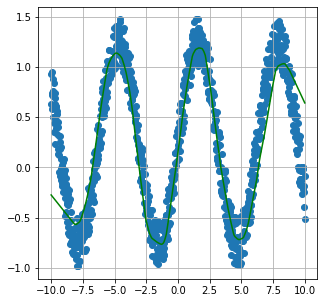

Epoch[1200/3600], loss:0.08107607066631317


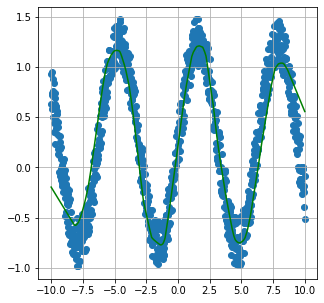

Epoch[1400/3600], loss:0.0709645003080368


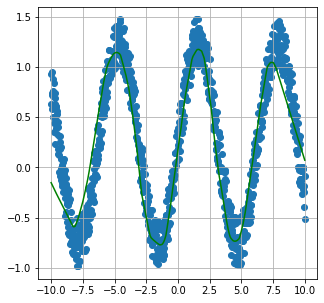

Epoch[1600/3600], loss:0.07061071693897247


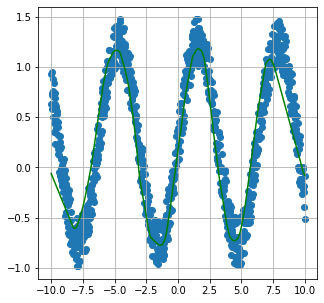

Epoch[1800/3600], loss:0.05452803149819374


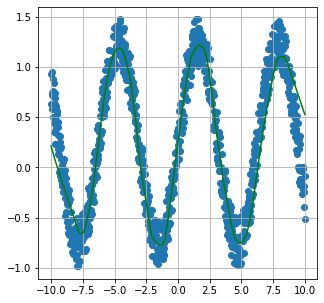

Epoch[2000/3600], loss:0.07572317868471146


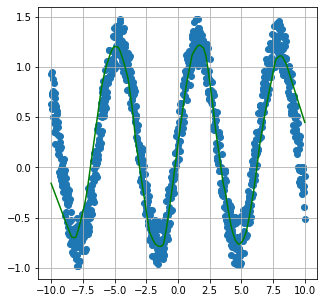

Epoch[2200/3600], loss:0.06145390123128891


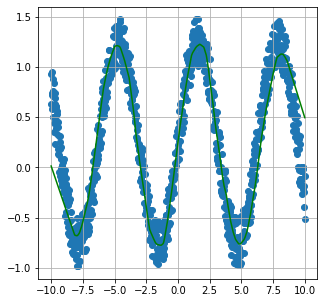

Epoch[2400/3600], loss:0.06059804558753967


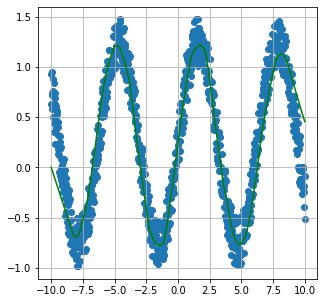

Epoch[2600/3600], loss:0.06265754252672195


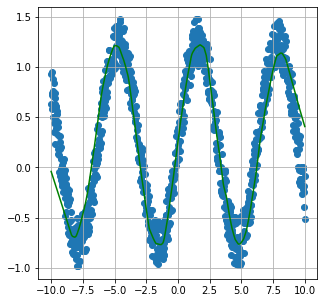

Epoch[2800/3600], loss:0.06447326391935349


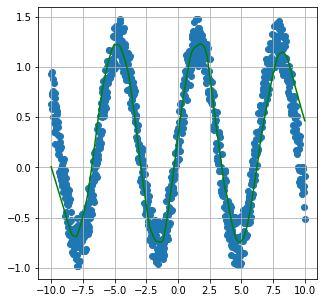

Epoch[3000/3600], loss:0.05290837585926056


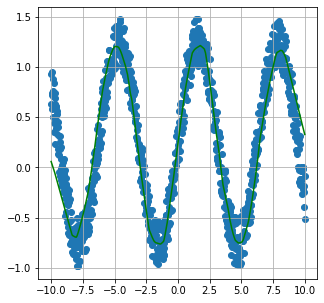

Epoch[3200/3600], loss:0.05560426786541939


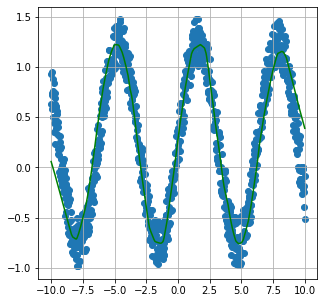

Epoch[3400/3600], loss:0.05129911005496979


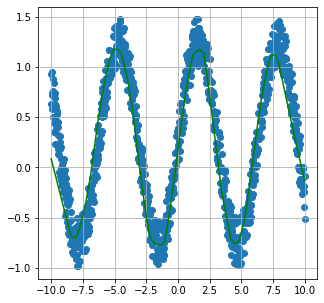

Epoch[3600/3600], loss:0.04368605092167854


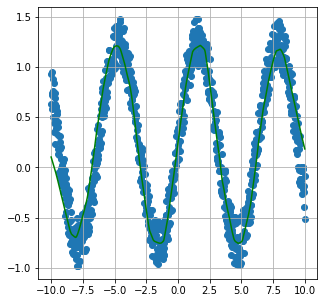

In [25]:
n_epoch=3600
loss_list=[]

for epoch in range(n_epoch+1):
  Y_pred=model(X)

  loss=criterion(Y_pred,Y)
  loss_list.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if(epoch%200==0):
    print('Epoch[{}/{}], loss:{}'.format(epoch,n_epoch,loss.item()))
    fig=plt.figure(figsize=(5,5))
    plt.scatter(X.data.numpy(), Y.data.numpy())
    plt.plot(X.data.numpy(),Y_pred.data.numpy(), 'g-')
    plt.grid()
    plt.show()

Este modelo de 6 capas estaba ya empezando a tomar la forma de la curva de los datos en la epoca 500. Entonces le aumente la cantidad de epocas hasta 3600 que era donde veía que empezaba a moverse sobre el mismo rango de loss. La red nueronal consiste de 6 capas. En las primeras 4 capas empece a aumentar en numero de neuronas paulatinamente. Mientras que en las ultimas dos reduje el numero de neuronas hasta obtener el la dimensionalidad del imput de entrada

# Segundo Modelo

In [26]:
input_dim=1
model_2= torch.nn.Sequential(
    #Primera capa
    torch.nn.Linear(input_dim,30),
    torch.nn.ReLU(),
    #Segunda capa
    torch.nn.Linear(30,50),
    torch.nn.ReLU(),
    #Tercera capa
    torch.nn.Linear(50,100),
    torch.nn.ReLU(),
    #Cuarta capa
    torch.nn.Linear(100,120),
    torch.nn.ReLU(),
    #Quinta capa
    torch.nn.Linear(120,200),
    torch.nn.ReLU(),
    #Sexta capa
    torch.nn.Linear(200,140),
    torch.nn.ReLU(),
    #Septima capa
    torch.nn.Linear(140,60),
    torch.nn.ReLU(),
    #Octaba capa
    torch.nn.Linear(60,10),
    torch.nn.ReLU(),
    #Novena capa
    torch.nn.Linear(10,input_dim),
            #%No ponemos función aqui por que queremos que nos de los varoles de la curva no uno entre 0 y 1
)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=120, bias=True)
  (7): ReLU()
  (8): Linear(in_features=120, out_features=200, bias=True)
  (9): ReLU()
  (10): Linear(in_features=200, out_features=140, bias=True)
  (11): ReLU()
  (12): Linear(in_features=140, out_features=60, bias=True)
  (13): ReLU()
  (14): Linear(in_features=60, out_features=10, bias=True)
  (15): ReLU()
  (16): Linear(in_features=10, out_features=1, bias=True)
)

In [27]:
optimizer= torch.optim.SGD(model_2.parameters(), lr=0.1)
criterion= torch.nn.MSELoss()

Epoch[0/1600], loss:0.6726461052894592


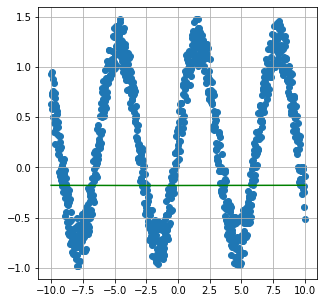

Epoch[100/1600], loss:0.48940563201904297


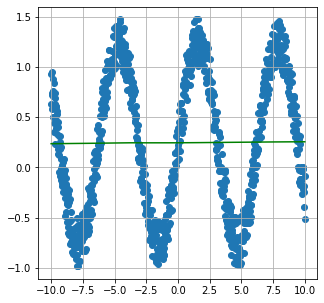

Epoch[200/1600], loss:0.4841887354850769


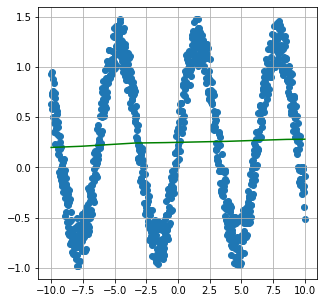

Epoch[300/1600], loss:0.46604859828948975


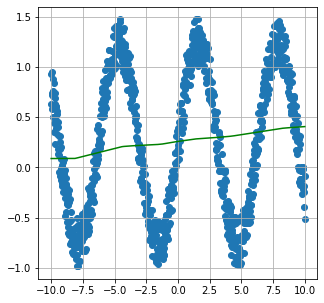

Epoch[400/1600], loss:0.4446463882923126


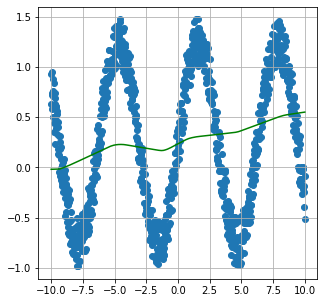

Epoch[500/1600], loss:0.3872120976448059


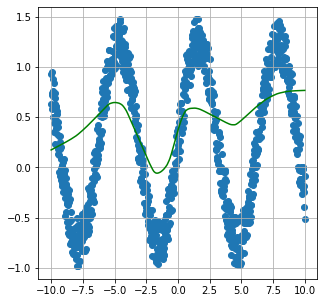

Epoch[600/1600], loss:0.3020908832550049


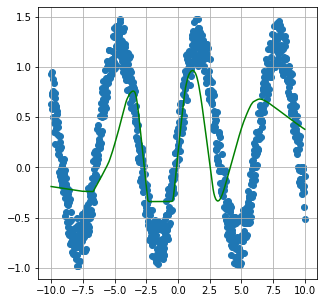

Epoch[700/1600], loss:0.18064501881599426


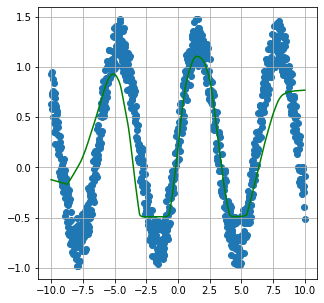

Epoch[800/1600], loss:0.1654883623123169


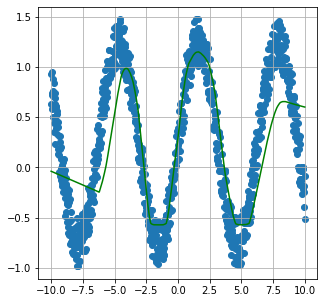

Epoch[900/1600], loss:0.17457954585552216


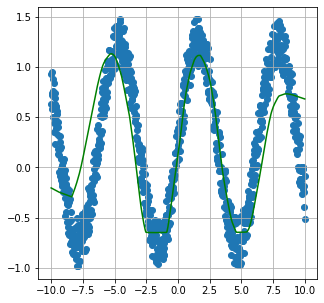

Epoch[1000/1600], loss:0.129713773727417


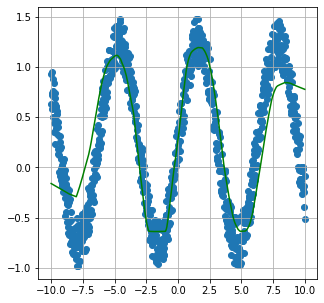

Epoch[1100/1600], loss:0.11438626050949097


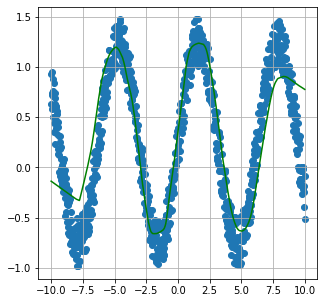

Epoch[1200/1600], loss:0.10642345994710922


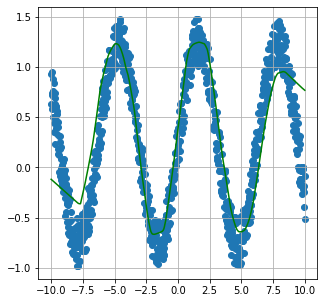

Epoch[1300/1600], loss:0.09983072429895401


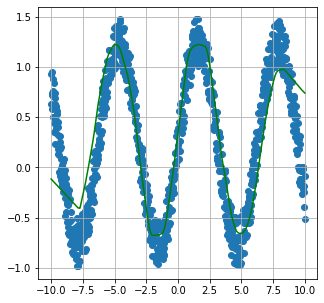

Epoch[1400/1600], loss:0.09590141475200653


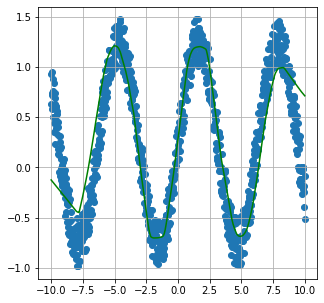

Epoch[1500/1600], loss:0.09422958642244339


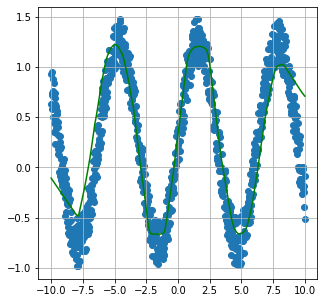

Epoch[1600/1600], loss:0.09454566985368729


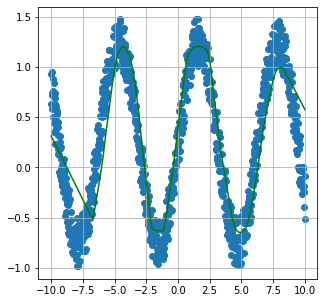

In [28]:
n_epoch=1600
loss_list=[]

for epoch in range(n_epoch+1):
  Y_pred=model_2(X)

  loss=criterion(Y_pred,Y)
  loss_list.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if(epoch%100==0):
    print('Epoch[{}/{}], loss:{}'.format(epoch,n_epoch,loss.item()))
    fig=plt.figure(figsize=(5,5))
    plt.scatter(X.data.numpy(), Y.data.numpy())
    plt.plot(X.data.numpy(),Y_pred.data.numpy(), 'g-')
    plt.grid()
    plt.show()

Con este modelo de 9 capas quería ver que sucedería si hacía un modelo que tuviera más capas pero que trabajara con menos epocas. pero aún así si lo comparamos con el modelo de 6 capas hizo un peor trabajo debido a que su loss era mayor. 

Entonces concluimos que el modelo de 6 capas aparte de ser más rápido en su trabajo. También nos arrojaba mejores resultados. Esto por los puntos discutidos anteriormente 